# Homework 5

## Part I

The concept that all our estimators have their own distribution, and therefore their own standard deviation, seems like a new concept but we are already familiar with one example:

For $N_{\rm obs}$ normal random variables with mean $\mu$ and standard deviation $\sigma$, our estimate of the mean, $\hat{\mu}$, has a distribution with standard deviation $\sigma/\sqrt{N_{\rm obs}}$. In reality, we do not know $\mu$ or $\sigma$ (if we did, why would we be estimating them!), so we approximate the standard deviation of $\hat{mu}$ with $\hat{\sigma}/\sqrt{N_{\rm obs}}$. This is called the __standard error of the mean__.

In this problem, we will explore whether the nonparametric bootstrap estimate of the standard deviation of $\hat{mu}$ agrees with the familiar formula of the standard error of the mean.


### 1.1 A single nonparametric bootstrap

The following code generates a sample of $N_{\rm obs}=20$ normal random variables.


In [100]:
NObs = 20
data = rnorm(NObs,178.1,12.1)
data

[1] 195.3657 187.2778 177.1500 161.2345 167.6676 185.3908 165.2719 189.0641
 [9] 173.2057 184.4432 182.7616 185.0686 199.2791 173.4529 178.2954 184.9325
[17] 166.1166 180.2559 166.5385 166.0709

Perform a non-parametric boostrap, say with 1000 resamplings, on the above data and estimate the mean $\hat{\mu}$ and the standard deviation $\hat{\sigma}$ each time. Output the standard deviation of $\hat{\mu}$. (In this block, the sample size is fixed at $N_{\rm obs}=20$.)

In [101]:
N = 1000
mean_hat_list = c()
sd_hat_list   = c()
for (i in 1:N)
{
    N_obs = 20
    new_sample = sample(N_obs, replace = TRUE)
    new_data   = data[new_sample]
    mean_hat_list[i] = mean(new_data)
    sd_hat_list[i]   = sd(new_data)
}
sd_mean = sd(sd_hat_list)
sd_mean

[1] 1.283033

Repeat the above, but in a loop, with $N_{\rm obs}$ ranging from 10 to 10000. Compute the standard deviation of $\hat{\mu}$ from non-parametric bootstrap for each value of $N_{\rm obs}$. Store the value of $\hat{\sigma}$ for each value of $N_{\rm obs}$ (because you will need it below).

Plot the standard deviation of $\hat{\mu}$ from non-parametric bootstrap versus $N_{\rm obs}$.

On the same axis, plot $\hat{\sigma}/\sqrt{N_{\rm obs}}$ versus $N_{\rm obs}$.

Do they agree?

In [102]:
N = 1000
n_list   = seq(10,10000,length=10)
sd_list  = c()
M = matrix(nrow=10, ncol=1000)

for (i in 1:length(n_list))

{
  data = rnorm(n_list[i],178.1,12.1)
  
    for (j in 1:NResample)
        
    {
        new_sample = sample(n_list[i], replace = TRUE)
        new_data   = data[new_sample]
        mean_hat_list[j] = mean(new_data)
        sd_hat_list[j]   = sd(new_data)
    }

  sd_mean = sd(mean_hat_list)
  sd_list[i] = sd_mean
    
  new_list = sd_hat_list / sqrt(n_list[i])  
  M[i, ] = new_list
}

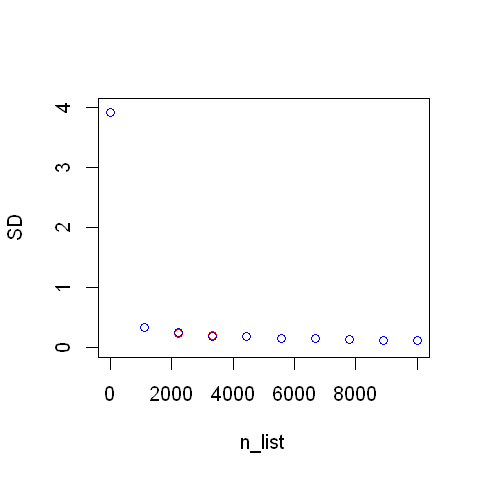

In [103]:
options(repr.plot.width=4, repr.plot.height=4)
plot(n_list,M[, 1],col='white',ylab='SD',ylim=c(0,4))
for (i in 1000:N)
{points(n_list,M[, i],col='red')}
points(n_list,sd_list,col='blue')

Yes, they agree.

# Part II: Bootstrap on coefficient of linear regression

The code below simulates some linear data with noise. Linear regression using lm will yield estimates for the parameters beta0 and beta1 (and sigma, which we will not focus on in this problem). 

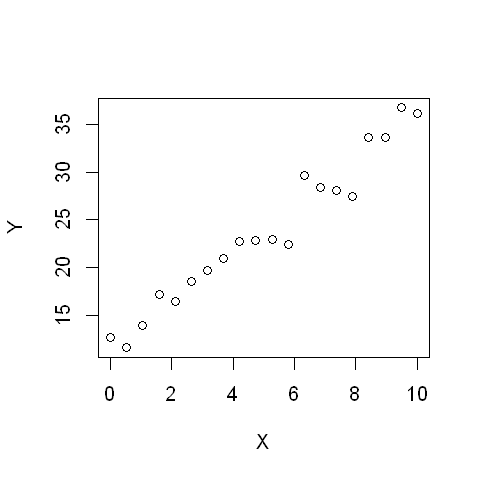

In [104]:
# Simulate some linear data with noise
NObs <- 20
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

X <- seq(0,10,length=NObs)
eps <- rnorm(NObs,0,sigma)

Y <- beta0 + beta1*X +eps

plot(X,Y)

In a loop, repeat the simulation and perform lm estimation, 1000 times. This will yield a distribution of estimates for beta_0 and beta_1. Plot histograms of these. Output the quantiles of these. (Note in reality one would not have this ability.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.719  10.111  10.485  10.501  10.914  12.073 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.331   2.529   2.600   2.599   2.668   2.939 

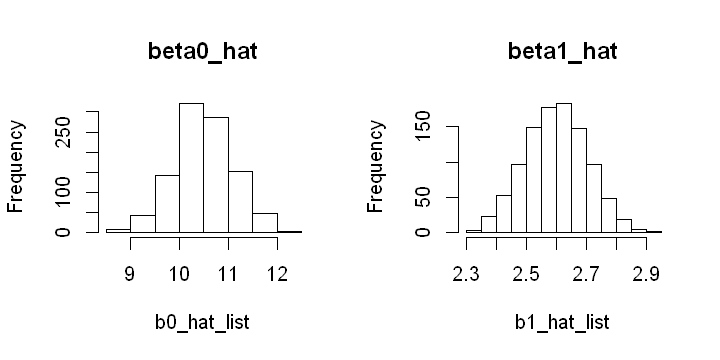

In [105]:
N = 1000

NObs <- 20
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

b0_hat_list = c()
b1_hat_list = c()

for (i in 1:N)
    
    {
    
    
    X <- seq(0,10,length=NObs)
    eps <- rnorm(NObs,0,sigma)
    Y <- beta0 + beta1*X +eps
    
    
    coef = lm(Y ~ X)
    b0_hat_list[i] = coefficients(coef)[1]
    b1_hat_list[i] = coefficients(coef)[2]
    
    }

options(repr.plot.width=6, repr.plot.height=3)


par(mfrow=c(1,2)) 
hist(b0_hat_list, main = "beta0_hat", breaks = 9)
hist(b1_hat_list, main = "beta1_hat", breaks = 9)

summary(b0_hat_list)
summary(b1_hat_list)

In reality, assume we only have 1 instance (in this example, with NObs=20 data points). 

Perform the simulation once to generate one data set with 20 points.

In [106]:
NObs <- 20
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

X <- seq(0,10,length=NObs)
eps <- rnorm(NObs,0,sigma)

Y <- beta0 + beta1*X +eps

coef = lm(Y ~ X)
b0_hat_0 = coefficients(coef)[1]
b1_hat_0 = coefficients(coef)[2]

Write code to perform non-parametric bootstrap on this data set. For a linear model like this, the resampling should be random pairs of X,Y data (so, to be clear, the resampling does not mix an X-value with a Y-value it did not belong with). 

Using the distribution of estimates for beta_0 and beta_1 from this non-parametric bootstrap, plot histograms and output quantiles. Compare with the "true" distributions from above.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.723  10.415  10.789  10.815  11.228  12.484 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.333   2.518   2.579   2.581   2.638   2.901 

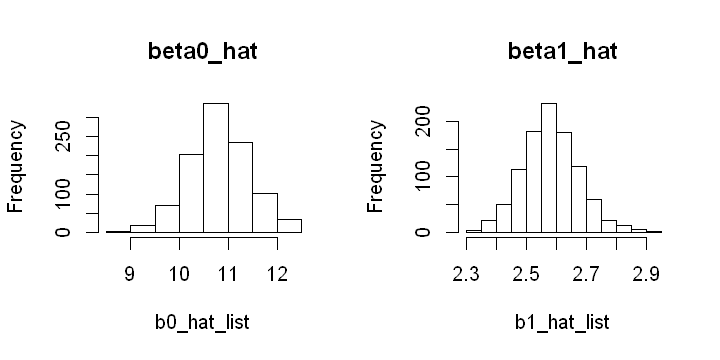

In [107]:
N = 1000

b0_hat_list = c()
b1_hat_list = c()

for (i in 1:N)

{
    
    once_data <- sample(NObs, replace = TRUE)
    x = X[once_data]
    y = Y[once_data]
    coef = lm(y ~ x)
    
    b0_hat_list[i] = coefficients(coef)[1]
    b1_hat_list[i] = coefficients(coef)[2]
}

options(repr.plot.width=6, repr.plot.height=3)
par(mfrow=c(1,2)) 

hist(b0_hat_list, main = "beta0_hat", breaks = 9)
hist(b1_hat_list, main = "beta1_hat", breaks = 9)

summary(b0_hat_list)
summary(b1_hat_list)

it's different becasue bottstrap did on a part of samples and consequently has bias.